# Clustering

<b> Overview </b>
- Cluster analysis or clustering is the task of grouping a set of objects in such a way that objects in the same group (called a cluster) are more similar (in some sense or another) to each other than to those in other groups (clusters). 

or

- Clustering is the task of gathering samples into groups of similar samples according to some predefined similarity or dissimilarity measure (such as the Euclidean distance).

In this section we will explore a basic clustering task on some synthetic and real datasets.

Here are some common applications of clustering algorithms:

- Primarily used for exploratory data analysis and business applications like customer segmentation, product segmentation, market segmentation.
- Compression, in a data reduction sense
- Can be used as a preprocessing step for recommender systems
- Similarly:
   - grouping related web news (e.g. Google News) and web search results
   - grouping related stock quotes for investment portfolio management
   - building customer profiles for market analysis
- Building a code book of prototype samples for unsupervised feature extraction

----
In this class we will explore a cluster technique called k-means & DBSCAN and understand how they works.

- Introduction to k-means() clustering
- Scaling of data before cluster analysis
- Dendogram to find out optimal number of clusters
- DBSCAN clustering

---
Can a clustering algorithm group them together by how nearer they are to each other?¶

Using K-means clustering technique
- k-mean calculates the distance between the points and the center using euclidean distance and then allocates the points to different clusters.


**Clustering comes with assumptions**: A clustering algorithm finds clusters by making assumptions with samples should be grouped together. Each algorithm makes different assumptions and the quality and interpretability of your results will depend on whether the assumptions are satisfied for your goal. 

> For K-means clustering, the model is that all clusters have equal, spherical variance.

**In general, there is no guarantee that structure found by a clustering algorithm has anything to do with what you were interested in**.

---

# Some Notable Clustering Routines
---

<br>

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_cluster_comparison_001.png">

<br>
---
The following are few well-known clustering algorithms. 

- `sklearn.cluster.KMeans`:  <br>
    The simplest, yet effective clustering algorithm. Needs to be provided with the
    number of clusters in advance, and assumes that the data is normalized as input
    (but use a PCA model as preprocessor). <br>  



- `sklearn.cluster.MeanShift`:<br>
    Can find better looking clusters than KMeans but is not scalable to high number of samples.<br>  



- `sklearn.cluster.DBSCAN`: <br>
    Can detect irregularly shaped clusters based on density, i.e. sparse regions in
    the input space are likely to become inter-cluster boundaries. Can also detect
    outliers (samples that are not part of a cluster).<br>  



- `sklearn.cluster.AffinityPropagation`: <br>
    Clustering algorithm based on message passing between data points.<br>  



- `sklearn.cluster.SpectralClustering`: <br>
    KMeans applied to a projection of the normalized graph Laplacian: finds
    normalized graph cuts if the affinity matrix is interpreted as an adjacency matrix of a graph.<br>  



- `sklearn.cluster.Ward`: <br>
    Ward implements hierarchical clustering based on the Ward algorithm,
    a variance-minimizing approach. At each step, it minimizes the sum of
    squared differences within all clusters (inertia criterion).<br>  
    

Of these, `Ward, SpectralClustering, DBSCAN` and `Affinity Propagation` can also work with precomputed similarity matrices.

## Part 2: Clustering evaluation (Finding optimal number of clusters)

This explains how to find optimal number of clusters in a given dataset by using various techniques.
Different techniques discussed here are
- Dendogram
- Elbow method
- Silhoutte score Analysis
We will first load the data into dataframe and scale the features and create clusters. And then various metrics are calculated to validate the number of cluster creations and what will be the optimal number of clusters.

---
The [Silhouette Coefficient](http://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) is a common metric for evaluating clustering "performance" in situations when the "true" cluster assignments are not known.

A Silhouette Coefficient is calculated for **each observation**:

$$SC = \frac{b-a} {max(a, b)}$$

- a = mean distance to all other points in **its cluster**
- b = mean distance to all other points in **the next nearest cluster**

It ranges from -1 (worst) to 1 (best). A **global score** is calculated by taking the mean score for all observations.

---
- The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
- The silhouette ranges from -1 to 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
- If most objects have a high value, then the clustering configuration is appropriate. If many points have a low or negative value, then the clustering configuration may have too many or too few clusters.
- The silhouette can be calculated with any distance metric, such as the Euclidean distance or the Manhattan distance.

## Using Dendogram

- Dendogram shows the distance between any two observations in a dataset. The vertical axis determines the distance. The longer the axis, the larger the distance.
- The clustermap feature in seaborn provides the dendogram. It also displays the distance between observations as well as the features. But we are mostly interested in observations.

# Elbow Analysis

- The Elbow method is a method of interpretation and validation of consistency within cluster analysis designed to help finding the appropriate number of clusters in a dataset.
- Explained Variance: This method looks at the percentage of variance explained as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't give much better modeling of the data.
- if one plots the percentage of variance explained by the clusters against the number of clusters the first clusters will add much information (explain a lot of variance), but at some point the marginal gain in explained variance will drop, giving an angle in the graph. The number of clusters is chosen at this point, hence the "elbow criterion"
- Given a set of observations (x1, x2, …, xn), where each observation is a d-dimensional real vector, k-means clustering aims to partition the n observations into k (≤ n) sets S = {S1, S2, …, Sk} so as to minimize the within-cluster sum of squares (WCSS) (sum of distance functions of each point in the cluster to the K center).
-In other words, its objective is to find: argminS∑i=1k∑x∈Si∥x−μi∥2

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True

from matplotlib.backends.backend_pdf import PdfPages

C:\Users\admin\Anaconda3\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\admin\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\admin\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\admin\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\admin\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "

In [2]:
from sklearn.cluster import KMeans

# center and scale the data
from sklearn.preprocessing import StandardScaler

In [3]:
# reading data into dataframe

telco= pd.read_csv("telco_csv.csv")

In [4]:
telco.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,0,0,0,1,0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,0,1,1,0,1,1,1,1,0,4
2,3,68,52,1,24,116,1,29,0,1,...,0,0,0,0,1,1,0,1,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,0,0,0,1,0,1,1,0,3


In [5]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 30 columns):
region      1000 non-null int64
tenure      1000 non-null int64
age         1000 non-null int64
marital     1000 non-null int64
address     1000 non-null int64
income      1000 non-null int64
ed          1000 non-null int64
employ      1000 non-null int64
retire      1000 non-null int64
gender      1000 non-null int64
reside      1000 non-null int64
tollfree    1000 non-null int64
equip       1000 non-null int64
callcard    1000 non-null int64
wireless    1000 non-null int64
longmon     1000 non-null float64
tollmon     1000 non-null float64
equipmon    1000 non-null float64
cardmon     1000 non-null float64
wiremon     1000 non-null float64
multline    1000 non-null int64
voice       1000 non-null int64
pager       1000 non-null int64
internet    1000 non-null int64
callid      1000 non-null int64
callwait    1000 non-null int64
forward     1000 non-null int64
confer      1000 non

In [6]:
telco.describe()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,...,0.475000,0.304000,0.2610,0.368000,0.481000,0.485000,0.493000,0.502000,0.371000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,...,0.499624,0.460213,0.4394,0.482503,0.499889,0.500025,0.500201,0.500246,0.483314,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,...,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [7]:
#Detailed profiling using pandas profiling

pandas_profiling.ProfileReport(telco)

Number of variables,30
Number of observations,1000
Total Missing (%),0.0%
Total size in memory,234.5 KiB
Average record size in memory,240.1 B
Numeric,12
Categorical,0
Boolean,16
Date,0
Text (Unique),0
Rejected,2


In [10]:
numeric_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(telco.dtypes) if dict(telco.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon', 'multline', 'voice', 'pager', 'internet', 'callid', 'callwait', 'forward', 'confer', 'ebill', 'custcat']
[]


In [11]:
telco_num=telco[numeric_var_names]
telco_num.head(5)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
0,2,13,44,1,9,64,4,5,0,0,...,0,0,0,0,0,0,1,0,0,1
1,3,11,33,1,7,136,5,5,0,0,...,0,1,1,0,1,1,1,1,0,4
2,3,68,52,1,24,116,1,29,0,1,...,0,0,0,0,1,1,0,1,0,3
3,2,33,33,0,12,33,2,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,2,23,30,1,9,30,1,2,0,0,...,0,0,0,0,1,0,1,1,0,3


In [12]:
telco_cat = telco[cat_var_names]
telco_cat.head(5)

""
0
1
2
3
4


In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=telco_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,1000.0,0.0,2022.0,2.0220,2.000,0.816200,0.666182,1.0,1.00,1.0000,1.000,1.0,2.000,3.0000,3.000,3.0000,3.0000,3.00
tenure,1000.0,0.0,35526.0,35.5260,34.000,21.359812,456.241566,1.0,1.00,4.0000,7.000,17.0,34.000,54.0000,66.000,70.0000,72.0000,72.00
age,1000.0,0.0,41684.0,41.6840,40.000,12.558816,157.723868,18.0,20.00,23.0000,26.000,32.0,40.000,51.0000,59.000,64.0000,70.0100,77.00
marital,1000.0,0.0,495.0,0.4950,0.000,0.500225,0.250225,0.0,0.00,0.0000,0.000,0.0,0.000,1.0000,1.000,1.0000,1.0000,1.00
address,1000.0,0.0,11551.0,11.5510,9.000,10.086681,101.741140,0.0,0.00,0.0000,1.000,3.0,9.000,18.0000,26.100,31.0000,43.0000,55.00
income,1000.0,0.0,77535.0,77.5350,47.000,107.044165,11458.453228,9.0,10.99,18.0000,21.000,29.0,47.000,83.0000,155.400,232.2500,460.4800,1668.00
ed,1000.0,0.0,2671.0,2.6710,3.000,1.222397,1.494253,1.0,1.00,1.0000,1.000,2.0,3.000,4.0000,4.000,5.0000,5.0000,5.00
employ,1000.0,0.0,10987.0,10.9870,8.000,10.082087,101.648479,0.0,0.00,0.0000,0.000,3.0,8.000,17.0000,25.000,31.0000,40.0100,47.00
retire,1000.0,0.0,47.0,0.0470,0.000,0.211745,0.044836,0.0,0.00,0.0000,0.000,0.0,0.000,0.0000,0.000,0.0000,1.0000,1.00
gender,1000.0,0.0,517.0,0.5170,1.000,0.499961,0.249961,0.0,0.00,0.0000,0.000,0.0,1.000,1.0000,1.000,1.0000,1.0000,1.00


In [15]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

telco_num=telco_num.apply(lambda x: outlier_capping(x))

In [16]:
telco.isnull().any()

region      False
tenure      False
age         False
marital     False
address     False
income      False
ed          False
employ      False
retire      False
gender      False
reside      False
tollfree    False
equip       False
callcard    False
wireless    False
longmon     False
tollmon     False
equipmon    False
cardmon     False
wiremon     False
multline    False
voice       False
pager       False
internet    False
callid      False
callwait    False
forward     False
confer      False
ebill       False
custcat     False
dtype: bool

In [17]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.mean())
    return x

telco_num=telco_num.apply(lambda x: Missing_imputation(x))

In [18]:
telco_num.corr()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,multline,voice,pager,internet,callid,callwait,forward,confer,ebill,custcat
region,1.000000,0.016388,0.012903,-0.080637,0.009533,0.023223,-0.057952,0.016618,0.005595,0.050596,...,-0.033015,-0.015158,0.000720,-0.000244,0.018199,0.010620,0.017541,-0.017269,0.030039,-0.023771
tenure,0.016388,1.000000,0.490613,0.154171,0.523968,0.290927,-0.109797,0.520351,0.171143,0.023533,...,0.409630,-0.005591,-0.020721,-0.140888,0.058311,0.086777,0.085884,0.133585,-0.157095,0.166691
age,0.012903,0.490613,1.000000,-0.011957,0.658073,0.388719,-0.154199,0.671798,0.419562,-0.013114,...,0.125595,-0.030625,-0.054286,-0.139855,0.082556,0.074877,0.082868,0.122958,-0.144105,0.059187
marital,-0.080637,0.154171,-0.011957,1.000000,-0.010709,-0.021195,0.001400,-0.001556,-0.078109,0.008345,...,0.091619,0.019654,0.044654,0.024220,0.035648,0.023712,0.043866,0.006040,-0.056495,0.083836
address,0.009533,0.523968,0.658073,-0.010709,1.000000,0.255677,-0.127278,0.459372,0.282156,0.006453,...,0.156613,-0.052115,-0.054958,-0.130435,0.034894,0.058743,0.080751,0.089632,-0.130124,0.069913
income,0.023223,0.290927,0.388719,-0.021195,0.255677,1.000000,0.124024,0.609636,-0.103679,0.040286,...,0.110432,0.126405,0.140025,-0.021190,0.172393,0.144545,0.143558,0.174063,-0.029922,0.171062
ed,-0.057952,-0.109797,-0.154199,0.001400,-0.127278,0.124024,1.000000,-0.227449,-0.114229,0.006704,...,0.265969,0.309637,0.301666,0.460052,0.031532,0.014027,0.029790,0.016628,0.405040,0.193864
employ,0.016618,0.520351,0.671798,-0.001556,0.459372,0.609636,-0.227449,1.000000,0.273281,0.044054,...,0.119225,-0.030786,-0.015814,-0.198302,0.143722,0.151557,0.116052,0.168114,-0.181322,0.110760
retire,0.005595,0.171143,0.419562,-0.078109,0.282156,-0.103679,-0.114229,0.273281,1.000000,0.053906,...,0.025311,-0.054319,-0.056666,-0.120472,0.032087,0.049210,0.036188,0.060538,-0.082524,0.008908
gender,0.050596,0.023533,-0.013114,0.008345,0.006453,0.040286,0.006704,0.044054,0.053906,1.000000,...,0.021740,0.016671,-0.031609,0.019685,0.001294,-0.031012,-0.035548,-0.002137,-0.015771,-0.004966


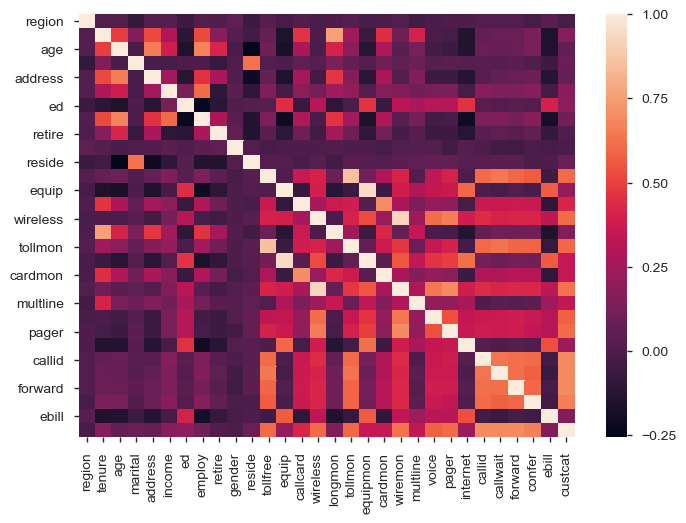

In [19]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(telco_num.corr())

### Standardrizing data 
- To put data on the same scale 

In [20]:
sc=StandardScaler()

telco_scaled=sc.fit_transform(telco_num)

In [21]:
pd.DataFrame(telco_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,...,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,2.304823e-16,-1.512124e-16,3.602674e-17,3.996803e-17,4.796163e-17,4.113376e-17,1.661449e-16,1.335598e-16,3.025358e-16,-2.111644e-16,...,-1.763034e-16,4.851675e-17,1.920686e-16,1.385558e-16,-2.176037e-17,2.331468e-18,-5.118128e-17,-2.153833e-17,2.264855e-17,-1.604272e-16
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,...,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.252771e+00,-1.617209e+00,-1.741293e+00,-9.900495e-01,-1.155079e+00,-8.100333e-01,-1.367671e+00,-1.098950e+00,-2.220764e-01,-1.034598e+00,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-7.680007e-01,-1.327980e+00
25%,-1.252771e+00,-8.677637e-01,-7.759238e-01,-9.900495e-01,-8.542771e-01,-5.777133e-01,-5.491964e-01,-7.978979e-01,-2.220764e-01,-1.034598e+00,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,-1.004008e+00,-7.680007e-01,-1.327980e+00
50%,-2.696767e-02,-7.147832e-02,-1.323441e-01,-9.900495e-01,-2.526735e-01,-3.455222e-01,2.692781e-01,-2.961447e-01,-2.220764e-01,9.665588e-01,...,-9.511897e-01,-6.608946e-01,-5.942895e-01,-7.630717e-01,-9.626953e-01,-9.704368e-01,-9.860966e-01,9.960080e-01,-7.680007e-01,4.581396e-01
75%,1.198836e+00,8.653280e-01,7.525780e-01,1.010051e+00,6.497319e-01,1.188599e-01,1.087753e+00,6.070109e-01,-2.220764e-01,9.665588e-01,...,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,1.302082e+00,4.581396e-01
max,1.198836e+00,1.708454e+00,2.281884e+00,1.010051e+00,3.156414e+00,4.988164e+00,1.906227e+00,2.916079e+00,4.502954e+00,9.665588e-01,...,1.051315e+00,1.513101e+00,1.682682e+00,1.310493e+00,1.038750e+00,1.030464e+00,1.014099e+00,9.960080e-01,1.302082e+00,1.351199e+00


### Applyting PCA

In [22]:
from sklearn.decomposition import PCA

In [23]:
pc = PCA(n_components=30)

In [24]:
pc.fit(telco_scaled)

#The amount of variance that each PC explains
var= pc.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pc.explained_variance_ratio_, decimals=4)*100)

In [25]:
var

array([ 0.24688118,  0.16367341,  0.09653286,  0.06053122,  0.04035125,
        0.03599086,  0.03510158,  0.03162522,  0.029569  ,  0.02631703,
        0.02253923,  0.02128887,  0.02030049,  0.01793457,  0.0161073 ,
        0.0153155 ,  0.0145946 ,  0.01454193,  0.01307356,  0.01213719,
        0.01182389,  0.01115274,  0.01008068,  0.00827538,  0.00667226,
        0.00643386,  0.00444643,  0.00351825,  0.00228776,  0.00090188])

In [26]:
var1

array([ 24.69,  41.06,  50.71,  56.76,  60.8 ,  64.4 ,  67.91,  71.07,
        74.03,  76.66,  78.91,  81.04,  83.07,  84.86,  86.47,  88.  ,
        89.46,  90.91,  92.22,  93.43,  94.61,  95.73,  96.74,  97.57,
        98.24,  98.88,  99.32,  99.67,  99.9 ,  99.99])

In [27]:
#Alternative method

var_ratio={}
for n in range(2,30):
    pc=PCA(n_components=n)
    telco_pca=pc.fit(telco_scaled)
    var_ratio[n]=sum(telco_pca.explained_variance_ratio_)
    
var_ratio

{2: 0.41055458921826204,
 3: 0.50708744699477748,
 4: 0.56761743875273196,
 5: 0.60796254729096322,
 6: 0.6439570274291333,
 7: 0.67902780874836544,
 8: 0.71066141389068826,
 9: 0.74024277509618752,
 10: 0.76652262741660304,
 11: 0.78909565916514912,
 12: 0.81038284228173929,
 13: 0.83063303889398343,
 14: 0.84862989229725982,
 15: 0.86473733723801849,
 16: 0.88004899674159021,
 17: 0.89465397312495754,
 18: 0.90919609631953979,
 19: 0.92226967219590861,
 20: 0.93440685788897293,
 21: 0.94623074430002407,
 22: 0.95738348921650362,
 23: 0.96746417313831612,
 24: 0.9757395487099374,
 25: 0.98241181254493193,
 26: 0.98884567742140717,
 27: 0.99329211162109976,
 28: 0.99681036212513585,
 29: 0.99909812353209571}

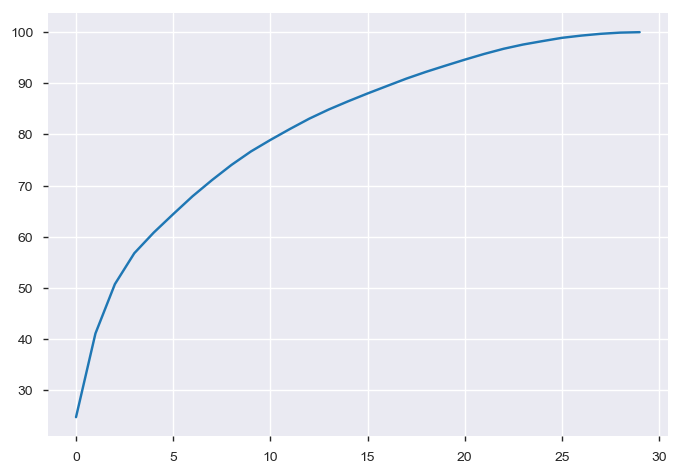

In [28]:
plt.plot(var1)

In [29]:

pc_final=PCA(n_components=10).fit(telco_scaled)

reduced_cr=pc_final.fit_transform(telco_scaled)

In [30]:
pd.DataFrame(reduced_cr).head(5)

,0,1,2,3,4,5,6,7,8,9
0,-2.600524,0.031004,-0.790435,0.370940,0.210425,-0.664285,0.771788,-0.562555,0.916410,0.163210
1,3.220803,-0.929950,-2.876136,1.574039,1.397991,-0.056153,-0.083791,-1.457905,0.915362,-1.337931
2,0.695585,3.988710,-0.296880,0.400508,0.657080,0.083281,-1.471426,-0.415966,0.320285,0.993834
3,-3.844349,-0.131949,-0.540173,-1.030121,-0.159160,0.107505,-0.615106,0.868094,-0.117622,-1.102532
4,-1.797359,-0.007878,-2.632671,1.211720,0.215171,0.532202,0.842421,-0.973042,-0.340529,-0.272962


In [31]:
col_list=telco_num.columns

In [32]:
col_list

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'tollfree', 'equip', 'callcard',
       'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon', 'wiremon',
       'multline', 'voice', 'pager', 'internet', 'callid', 'callwait',
       'forward', 'confer', 'ebill', 'custcat'],
      dtype='object')

#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [33]:
#pc_final.components_

#print pd.DataFrame(pc_final.components_,columns=telco_num.columns).T

Loadings =  pd.DataFrame((pc_final.components_.T * np.sqrt(pc_final.explained_variance_)).T,columns=telco_num.columns).T

In [34]:
Loadings.to_csv("Loadings.csv")

### Clustering 

In [35]:
list_var = ['custcat','pager','wiremon','equipmon','ebill','multline','marital','income','retire','gender','region']

In [36]:
telco_scaled1=pd.DataFrame(telco_scaled, columns=telco_num.columns)
telco_scaled1.head(5)

telco_scaled2=telco_scaled1[list_var]
telco_scaled2.head(5)

,custcat,pager,wiremon,equipmon,ebill,multline,marital,income,retire,gender,region
0,-1.327980,-0.594289,-0.598794,-0.749071,-0.768001,-0.95119,1.010051,-0.126231,-0.222076,-1.034598,-0.026968
1,1.351199,1.682682,1.275872,-0.749071,-0.768001,-0.95119,1.010051,0.802534,-0.222076,-1.034598,1.198836
2,0.458140,-0.594289,-0.598794,-0.749071,-0.768001,-0.95119,1.010051,0.544543,-0.222076,0.966559,1.198836
3,-1.327980,-0.594289,-0.598794,-0.749071,-0.768001,-0.95119,-0.990050,-0.526115,-0.222076,0.966559,-0.026968
4,0.458140,-0.594289,-0.598794,-0.749071,-0.768001,-0.95119,1.010051,-0.564814,-0.222076,-1.034598,-0.026968


In [37]:
from sklearn.cluster import KMeans

In [38]:
km_3=KMeans(n_clusters=3,random_state=123)

In [39]:
km_3.fit(telco_scaled2)
#km_4.labels_

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

In [40]:
km_3.cluster_centers_

array([[  4.01116820e-02,  -2.55166107e-01,  -1.17809910e-01,
         -4.19564733e-01,  -3.71601890e-01,   1.13972342e-01,
         -3.51719714e-01,  -4.66859873e-01,   4.50295411e+00,
          2.42736087e-01,   2.51941678e-02],
       [ -4.09440488e-01,  -5.03340550e-01,  -4.83763038e-01,
         -3.30167171e-01,  -2.15781772e-01,  -1.82753549e-01,
         -2.85178311e-02,  -6.76967320e-02,  -2.22076436e-01,
         -6.89985232e-03,  -4.23522873e-03],
       [  1.13147831e+00,   1.44775608e+00,   1.36767839e+00,
          9.96693371e-01,   6.69556790e-01,   4.87117214e-01,
          1.44927881e-01,   2.75388187e-01,  -2.22076436e-01,
         -2.60785698e-02,   7.08241847e-03]])

In [42]:
km_3.labels_

array([1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2,
       1, 0,

In [43]:
pd.Series(km_3.labels_).value_counts()

1    701
2    252
0     47
dtype: int64

In [44]:
km_4=KMeans(n_clusters=4,random_state=123).fit(telco_scaled2)
#km_5.labels_a

km_5=KMeans(n_clusters=5,random_state=123).fit(telco_scaled2)
#km_5.labels_

km_6=KMeans(n_clusters=6,random_state=123).fit(telco_scaled2)
#km_6.labels_

km_7=KMeans(n_clusters=7,random_state=123).fit(telco_scaled2)
#km_7.labels_

km_8=KMeans(n_clusters=8,random_state=123).fit(telco_scaled2)
#km_5.labels_

In [45]:
# Conactenating labels found through Kmeans with data 
#cluster_df_4=pd.concat([telco_num,pd.Series(km_4.labels_,name='Cluster_4')],axis=1)

# save the cluster labels and sort by cluster
telco_num['cluster_3'] = km_3.labels_
telco_num['cluster_4'] = km_4.labels_
telco_num['cluster_5'] = km_5.labels_
telco_num['cluster_6'] = km_6.labels_
telco_num['cluster_7'] = km_7.labels_
telco_num['cluster_8'] = km_8.labels_

In [44]:
telco_num.head(5)

,reside,ed,retire,marital,equip,wiremon,tollmon,callcard,longmon,income,...,tollfree,tenure,voice,age,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,2.0,4,0,1,0,0.0,0.00,1,3.70,64.0,...,0,13,0,44.0,1,2,3,1,6,1
1,6.0,5,0,1,0,35.7,20.75,1,4.40,136.0,...,1,11,1,33.0,2,3,0,2,3,2
2,2.0,1,0,1,0,0.0,18.00,1,18.15,116.0,...,1,68,0,52.0,1,2,1,4,6,1
3,1.0,2,0,0,0,0.0,0.00,0,9.45,33.0,...,0,33,0,33.0,1,2,3,4,2,3
4,4.0,1,0,1,0,0.0,0.00,0,6.30,30.0,...,0,23,0,30.0,1,2,1,1,6,1


In [47]:
pd.Series.sort_index(telco_num.cluster_3.value_counts())

0     47
1    701
2    252
Name: cluster_3, dtype: int64

In [48]:
pd.Series(telco_num.cluster_3.size)

0    1000
dtype: int64

In [46]:
size=pd.concat([pd.Series(telco_num.cluster_3.size), pd.Series.sort_index(telco_num.cluster_3.value_counts()), pd.Series.sort_index(telco_num.cluster_4.value_counts()),
           pd.Series.sort_index(telco_num.cluster_5.value_counts()), pd.Series.sort_index(telco_num.cluster_6.value_counts()),
           pd.Series.sort_index(telco_num.cluster_7.value_counts()), pd.Series.sort_index(telco_num.cluster_8.value_counts())])

In [47]:
size

0    1000
0      47
1     701
2     252
0      47
1     285
2     433
3     235
0     220
1     266
2     206
3     261
4      47
0      50
1     240
2     209
3     202
4     252
5      47
0      49
1     163
2     236
3     204
4     137
5      47
6     164
0      87
1     160
2     200
3     174
4     122
5      47
6     166
7      44
dtype: int64

In [49]:
Seg_size=pd.DataFrame(size, columns=['Seg_size'])
Seg_Pct = pd.DataFrame(size/telco_num.cluster_3.size, columns=['Seg_Pct'])
Seg_size.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_size,1000,47,701,252,47,285,433,235,220,266,...,47,164,87,160,200,174,122,47,166,44


In [50]:
Seg_Pct.T

,0,0,1,2,0,1,2,3,0,1,...,5,6,0,1,2,3,4,5,6,7
Seg_Pct,1.0,0.047,0.701,0.252,0.047,0.285,0.433,0.235,0.22,0.266,...,0.047,0.164,0.087,0.16,0.2,0.174,0.122,0.047,0.166,0.044


In [50]:
telco_num.head(5)

,reside,ed,retire,marital,equip,wiremon,tollmon,callcard,longmon,income,...,tollfree,tenure,voice,age,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
0,2.0,4,0,1,0,0.0,0.00,1,3.70,64.0,...,0,13,0,44.0,1,2,3,1,6,1
1,6.0,5,0,1,0,35.7,20.75,1,4.40,136.0,...,1,11,1,33.0,2,3,0,2,3,2
2,2.0,1,0,1,0,0.0,18.00,1,18.15,116.0,...,1,68,0,52.0,1,2,1,4,6,1
3,1.0,2,0,0,0,0.0,0.00,0,9.45,33.0,...,0,33,0,33.0,1,2,3,4,2,3
4,4.0,1,0,1,0,0.0,0.00,0,6.30,30.0,...,0,23,0,30.0,1,2,1,1,6,1


In [51]:
# Mean value gives a good indication of the distribution of data. So we are finding mean value for each variable for each cluster
Profling_output = pd.concat([telco_num.apply(lambda x: x.mean()).T, telco_num.groupby('cluster_3').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_4').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_5').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_6').apply(lambda x: x.mean()).T,
          telco_num.groupby('cluster_7').apply(lambda x: x.mean()).T, telco_num.groupby('cluster_8').apply(lambda x: x.mean()).T], axis=1)

Profling_output_final=pd.concat([Seg_size.T, Seg_Pct.T, Profling_output], axis=0)
#Profling_output_final.columns = ['Seg_' + str(i) for i in Profling_output_final.columns]
Profling_output_final.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',]

In [52]:
Profling_output_final

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM7_6,KM7_7,KM8_1,KM8_2,KM8_3,KM8_4,KM8_5,KM8_6,KM8_7,KM8_8
Seg_size,1000.000000,47.000000,701.000000,252.000000,47.000000,285.000000,433.000000,235.000000,220.000000,266.000000,...,47.000000,164.000000,87.000000,160.000000,200.000000,174.000000,122.000000,47.000000,166.000000,44.000000
Seg_Pct,1.000000,0.047000,0.701000,0.252000,0.047000,0.285000,0.433000,0.235000,0.220000,0.266000,...,0.047000,0.164000,0.087000,0.160000,0.200000,0.174000,0.122000,0.047000,0.166000,0.044000
region,2.022000,2.042553,2.018545,2.027778,2.042553,1.985965,2.043880,2.021277,2.004545,1.962406,...,2.042553,1.878049,2.218391,1.893750,1.990000,2.103448,2.016393,2.042553,1.939759,2.227273
tenure,35.526000,51.978723,34.149786,36.285714,51.978723,45.224561,27.256351,35.710638,35.436364,44.793233,...,51.978723,31.365854,17.977011,31.618750,34.715000,26.982759,36.975410,51.978723,48.373494,51.840909
age,41.645100,65.129574,40.368060,40.817460,65.129574,41.807018,39.457298,40.782979,40.486364,42.748120,...,65.129574,40.140244,36.149425,40.168750,39.660000,39.298908,39.393443,65.129574,42.126506,55.522727
marital,0.495000,0.319149,0.480742,0.567460,0.319149,0.561404,0.438799,0.553191,0.550000,0.691729,...,0.319149,1.000000,0.310345,1.000000,0.560000,0.000000,0.549180,0.319149,0.584337,0.386364
address,11.520000,24.191489,10.912981,10.845238,24.191489,12.673684,9.794457,10.765957,10.522727,12.992481,...,24.191489,9.969512,7.793103,10.125000,10.100000,9.919540,10.303279,24.191489,13.427711,19.386364
income,73.785700,37.593617,68.537689,95.134444,37.593617,75.761263,63.655797,97.293106,91.536000,87.245865,...,37.593617,53.030488,57.390805,52.493750,74.720000,58.494253,62.278689,37.593617,62.903614,351.472727
ed,2.671000,2.042553,2.450785,3.400794,2.042553,2.814035,2.251732,3.395745,3.413636,2.357143,...,2.042553,2.036585,3.011494,2.000000,3.425000,2.068966,3.360656,2.042553,2.481928,2.863636
employ,10.951100,23.213830,10.309601,10.448492,23.213830,11.042140,9.741386,10.617106,10.177364,12.552669,...,23.213830,9.591463,5.965517,9.706250,9.195000,10.132241,8.590164,23.213830,11.222892,28.978182


In [53]:
Profling_output_final.to_csv('Profiling_output.csv')

### Finding Optimal number of clusters

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


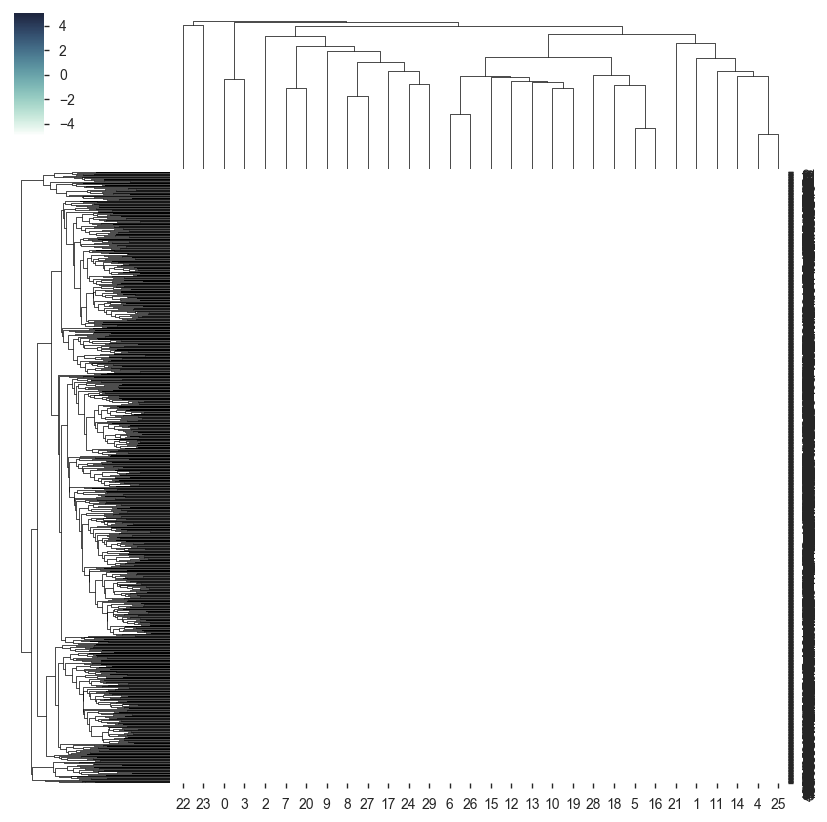

In [136]:
# Dendogram

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(telco_scaled, cmap=cmap, linewidths=.5)

<b> Note: </b>

- The dendogram shows there are 5 disctinct clusters. 

### Elbow Analysis 

In [54]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( telco_scaled2 )
    cluster_errors.append( clusters.inertia_ )

In [55]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

clusters_df[0:10]

,cluster_errors,num_clusters
0,11000.000000,1
1,8554.095726,2
2,7736.487221,3
3,7020.651964,4
4,6303.582643,5
5,5811.956928,6
6,5504.642205,7
7,5226.771445,8
8,5040.460914,9
9,4830.253507,10


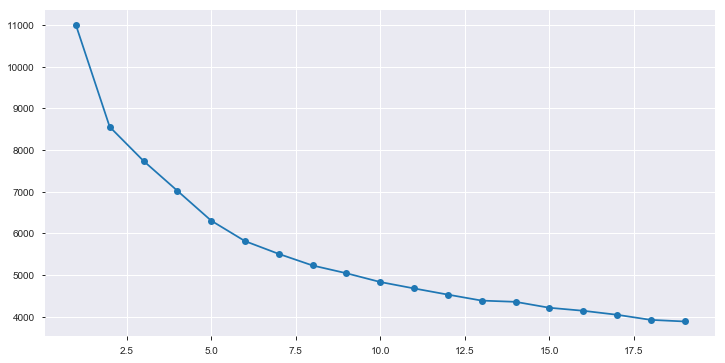

In [56]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

### Note:
- The elbow diagram shows that the gain in explained variance reduces significantly from 3 to 4 to 5. So, optimal number of clusters could either 4 or 5. 
- The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

### Silhouette Coefficient

In [57]:
# calculate SC for K=3
from sklearn import metrics
metrics.silhouette_score(telco_scaled2, km_3.labels_)

0.28741854434649883

In [58]:
# calculate SC for K=3 through K=12
k_range = range(3, 12)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(telco_scaled2)
    scores.append(metrics.silhouette_score(telco_scaled2, km.labels_))

In [59]:
scores

[0.16307735383112612,
 0.18246003365287652,
 0.18378349535696059,
 0.18229728448986079,
 0.17583259875144666,
 0.17327159849238155,
 0.1716981975425772,
 0.18994327576124415,
 0.18018977713144396]

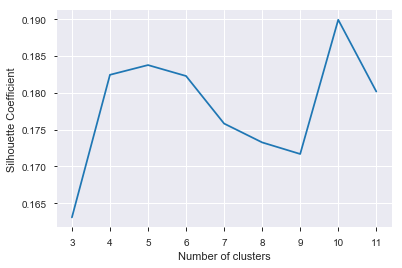

In [60]:
# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

### Note

The solution can be 4 or 5 or 6

#  DBSCAN clustering
### Density-based spatial clustering of applications with noise (DBSCAN) 

In [83]:
# DBSCAN with eps=1 and min_samples=3
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=2.05, min_samples=10)
db.fit(telco_scaled2)

DBSCAN(algorithm='auto', eps=2.05, leaf_size=30, metric='euclidean',
    min_samples=10, n_jobs=1, p=None)

In [84]:
pd.Series(db.labels_).value_counts()

 0    473
-1    216
 2    115
 1    101
 3     71
 4     13
 5     11
dtype: int64

In [85]:
# review the cluster labels
db.labels_

array([ 0, -1,  0,  0,  0,  0,  1,  2,  0,  0, -1,  0,  0,  2,  0,  0,  0,
        0,  0, -1, -1,  0, -1,  0,  0,  0,  1,  0,  0,  1,  1, -1,  0,  0,
        2,  1,  2,  0,  0, -1,  0,  0,  0,  2,  0,  1,  1,  2,  0, -1,  0,
        0,  2,  0,  3, -1,  0,  0,  0,  1,  0,  4,  0, -1,  2,  0,  0, -1,
        0,  3,  0,  1,  0,  1,  0, -1,  0,  5,  0,  2,  4,  0, -1, -1,  0,
        3,  0,  2,  2,  0, -1,  0,  1, -1,  3, -1,  0,  0,  0,  0,  1,  1,
        0, -1,  1,  1,  0, -1,  3,  0,  1,  0,  3,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  3,  0, -1,  1,  0,  4,  0,  0, -1,  1, -1,  3,
        0, -1, -1,  2, -1,  0,  2, -1, -1,  3,  2,  0,  0,  0,  0,  0,  2,
        2,  2,  0,  3,  0,  1,  0,  0, -1,  0,  0,  1,  0, -1,  0,  3,  1,
       -1,  0,  2,  3,  0, -1,  0, -1,  2,  0,  2,  0,  0,  1,  0,  3,  3,
        2,  0,  0,  0,  2,  0,  0,  2,  0,  0,  0,  3, -1,  0, -1,  0,  0,
       -1,  0, -1,  2, -1,  0,  0,  3,  3,  1,  0,  0,  0,  1, -1,  3,  0,
       -1,  3,  0,  0, -1

In [86]:
# save the cluster labels and sort by cluster
telco_num['DB_cluster'] = db.labels_

In [87]:
# review the cluster centers
telco_num.groupby('DB_cluster').mean()

,reside,ed,retire,marital,equip,wiremon,tollmon,callcard,longmon,income,...,tollfree,tenure,voice,age,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8
DB_cluster,,,,,,,,,,,,,,,,,,,,,
-1,2.231481,2.935185,0.166667,0.481481,0.439815,21.385069,22.470255,0.847222,14.500498,121.336852,...,0.722222,40.097222,0.518519,46.569722,1.375000,2.037037,1.370370,2.268519,2.824074,3.638889
0,2.340381,2.160677,0.000000,0.517970,0.133192,1.728013,10.059789,0.653277,11.407188,60.556025,...,0.393235,35.976744,0.103594,41.033848,1.000000,1.668076,2.044397,2.513742,3.044397,3.391121
1,2.475248,3.336634,0.000000,0.554455,0.712871,3.195545,3.230198,0.495050,11.312054,61.198020,...,0.148515,38.009901,0.217822,39.613861,1.069307,1.019802,1.970297,2.990099,2.326733,4.000000
2,2.408696,3.582609,0.000000,0.469565,1.000000,42.537717,20.680565,0.834783,9.853478,70.843478,...,0.800000,32.043478,0.860870,38.000000,2.000000,3.000000,0.000000,2.000000,3.000000,2.000000
3,2.140845,3.000000,0.000000,0.323944,0.577465,2.618310,2.517606,0.281690,6.110563,47.943662,...,0.140845,17.971831,0.169014,35.394366,1.000000,2.000000,2.000000,3.000000,4.112676,0.000000
4,3.307692,2.692308,0.000000,1.000000,0.000000,43.543269,38.675385,1.000000,15.807692,78.384615,...,0.923077,53.846154,0.769231,44.461538,2.000000,2.846154,0.076923,2.153846,2.846154,2.307692
5,1.090909,1.636364,1.000000,0.000000,0.000000,0.000000,6.318182,0.636364,10.581818,16.630909,...,0.272727,31.636364,0.000000,65.002727,0.000000,0.000000,4.000000,5.000000,5.000000,5.000000
